In [10]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import matplotlib as mlp
from matplotlib import rcParams
import itertools
import matplotlib.font_manager
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colors import LogNorm

In [11]:
# 플랏 기본 세팅

# 센치미터를 인치로 변환하는 함수
def cm2in(value):
    return value/2.54

def kilo(value):
    return value/1000

def Mega(value):
    return value/1000000

# 폰트 크기 변수 
FS = 8
LEG_FS = FS-1

# 글씨 두께 변수 0.25 간격
LW = np.arange(0, 3.0, 0.25)

# 라인 스타일
DOTTED1 = (1, 1.25)
DASHDOTTED1 = (2.5, 1.25, 1.25, 1.25)
SUBPLOT_NO = list(map(chr, range(97, 123)))


loosely_dotted = (0, (1, 10))
dotted = (0, (1, 1))
densely_dotted = (0, (1, 1))
long_dash_with_offset = 5, (10, 3)
loosely_dashed = (0, (5, 10))
dashed = (0, (5, 5))
densely_dashed = (0, (5, 1))
loosely_dashdotted = (0, (3, 10, 1, 10))
dashdotted = (0, (3, 5, 1, 5))
densely_dashdotted = (0, (3, 1, 1, 1))
dashdotdotted = (0, (3, 5, 1, 5, 1, 5))
loosely_dashdotdotted = (0, (3, 10, 1, 10, 1, 10))
densely_dashdotdotted = (0, (3, 1, 1, 1, 1, 1))

def D2K(val): 
    return val + 273.15 
def K2D(val):
    return val - 273.15

# 기본인 폰트, 플랏 선 설정

PLT_RC_PARAMS = {
    "font": {
        "size": 8,
        # "family": "sans-serif",
        "family": "Calibri",
    },
    "pdf": {
        "fonttype": 42,
    },
    "lines": {
        "dotted_pattern": [1.0, 1.25],
        "dashed_pattern": [0.7, 9],     # only for grid line
        # "dashed_pattern": [3, 1.5],     # for data line 
        "dashdot_pattern": [1, 1.25, 4, 1.25],
    },
    "legend": {
        "columnspacing": 0.75,
        "labelspacing": 0.4,
        "numpoints": 1,         # legend number of markers
        "borderaxespad": 0.4,   # axes 틀로부터 legend 경계까지 거리 
        "handletextpad": 0.3,   # 선과 선이름 사이의 간격 
        "fancybox": False,
        
    },
    "axes": {
        "linewidth": 0.5 
    },
    "xtick": {
        "major": {
            "width": 0.5,
            "size": 2.0,
        },
        "minor": {
            "width": 0.25,
            "size": 1.0,
        },
        "direction": "in",
    },
    "ytick": {
        "major": {
            "width": 0.5,
            "size": 2.0,
        },
        "minor": {
            "width": 0.25,
            "size": 1.0,
        },
        "direction": "in",
    },
    "figure": {
        "dpi": 300
    },
    
    # Other parameters...

    
}

## CSV

In [12]:
# csv 파일
df_exergy_c_data = pd.read_csv('../data/df_exergy_c.csv')
df_exergy_OB = pd.read_csv('../data_BL/exergy_EXBL.csv')
df_exergy_IB  = pd.read_csv('../data_BL/exergy_IB.csv')

## Timestep

In [13]:
# time step, 시간 축 설정
t = 600
hour_to_sec = 3600

winter_start_day = 24
winter_end_day = 192

## Plot code

왼쪽 하단 꼭짓점: 0.0 0.0
오른쪽 상단 꼭짓점: 2834.6456692913384 1653.5433070866143


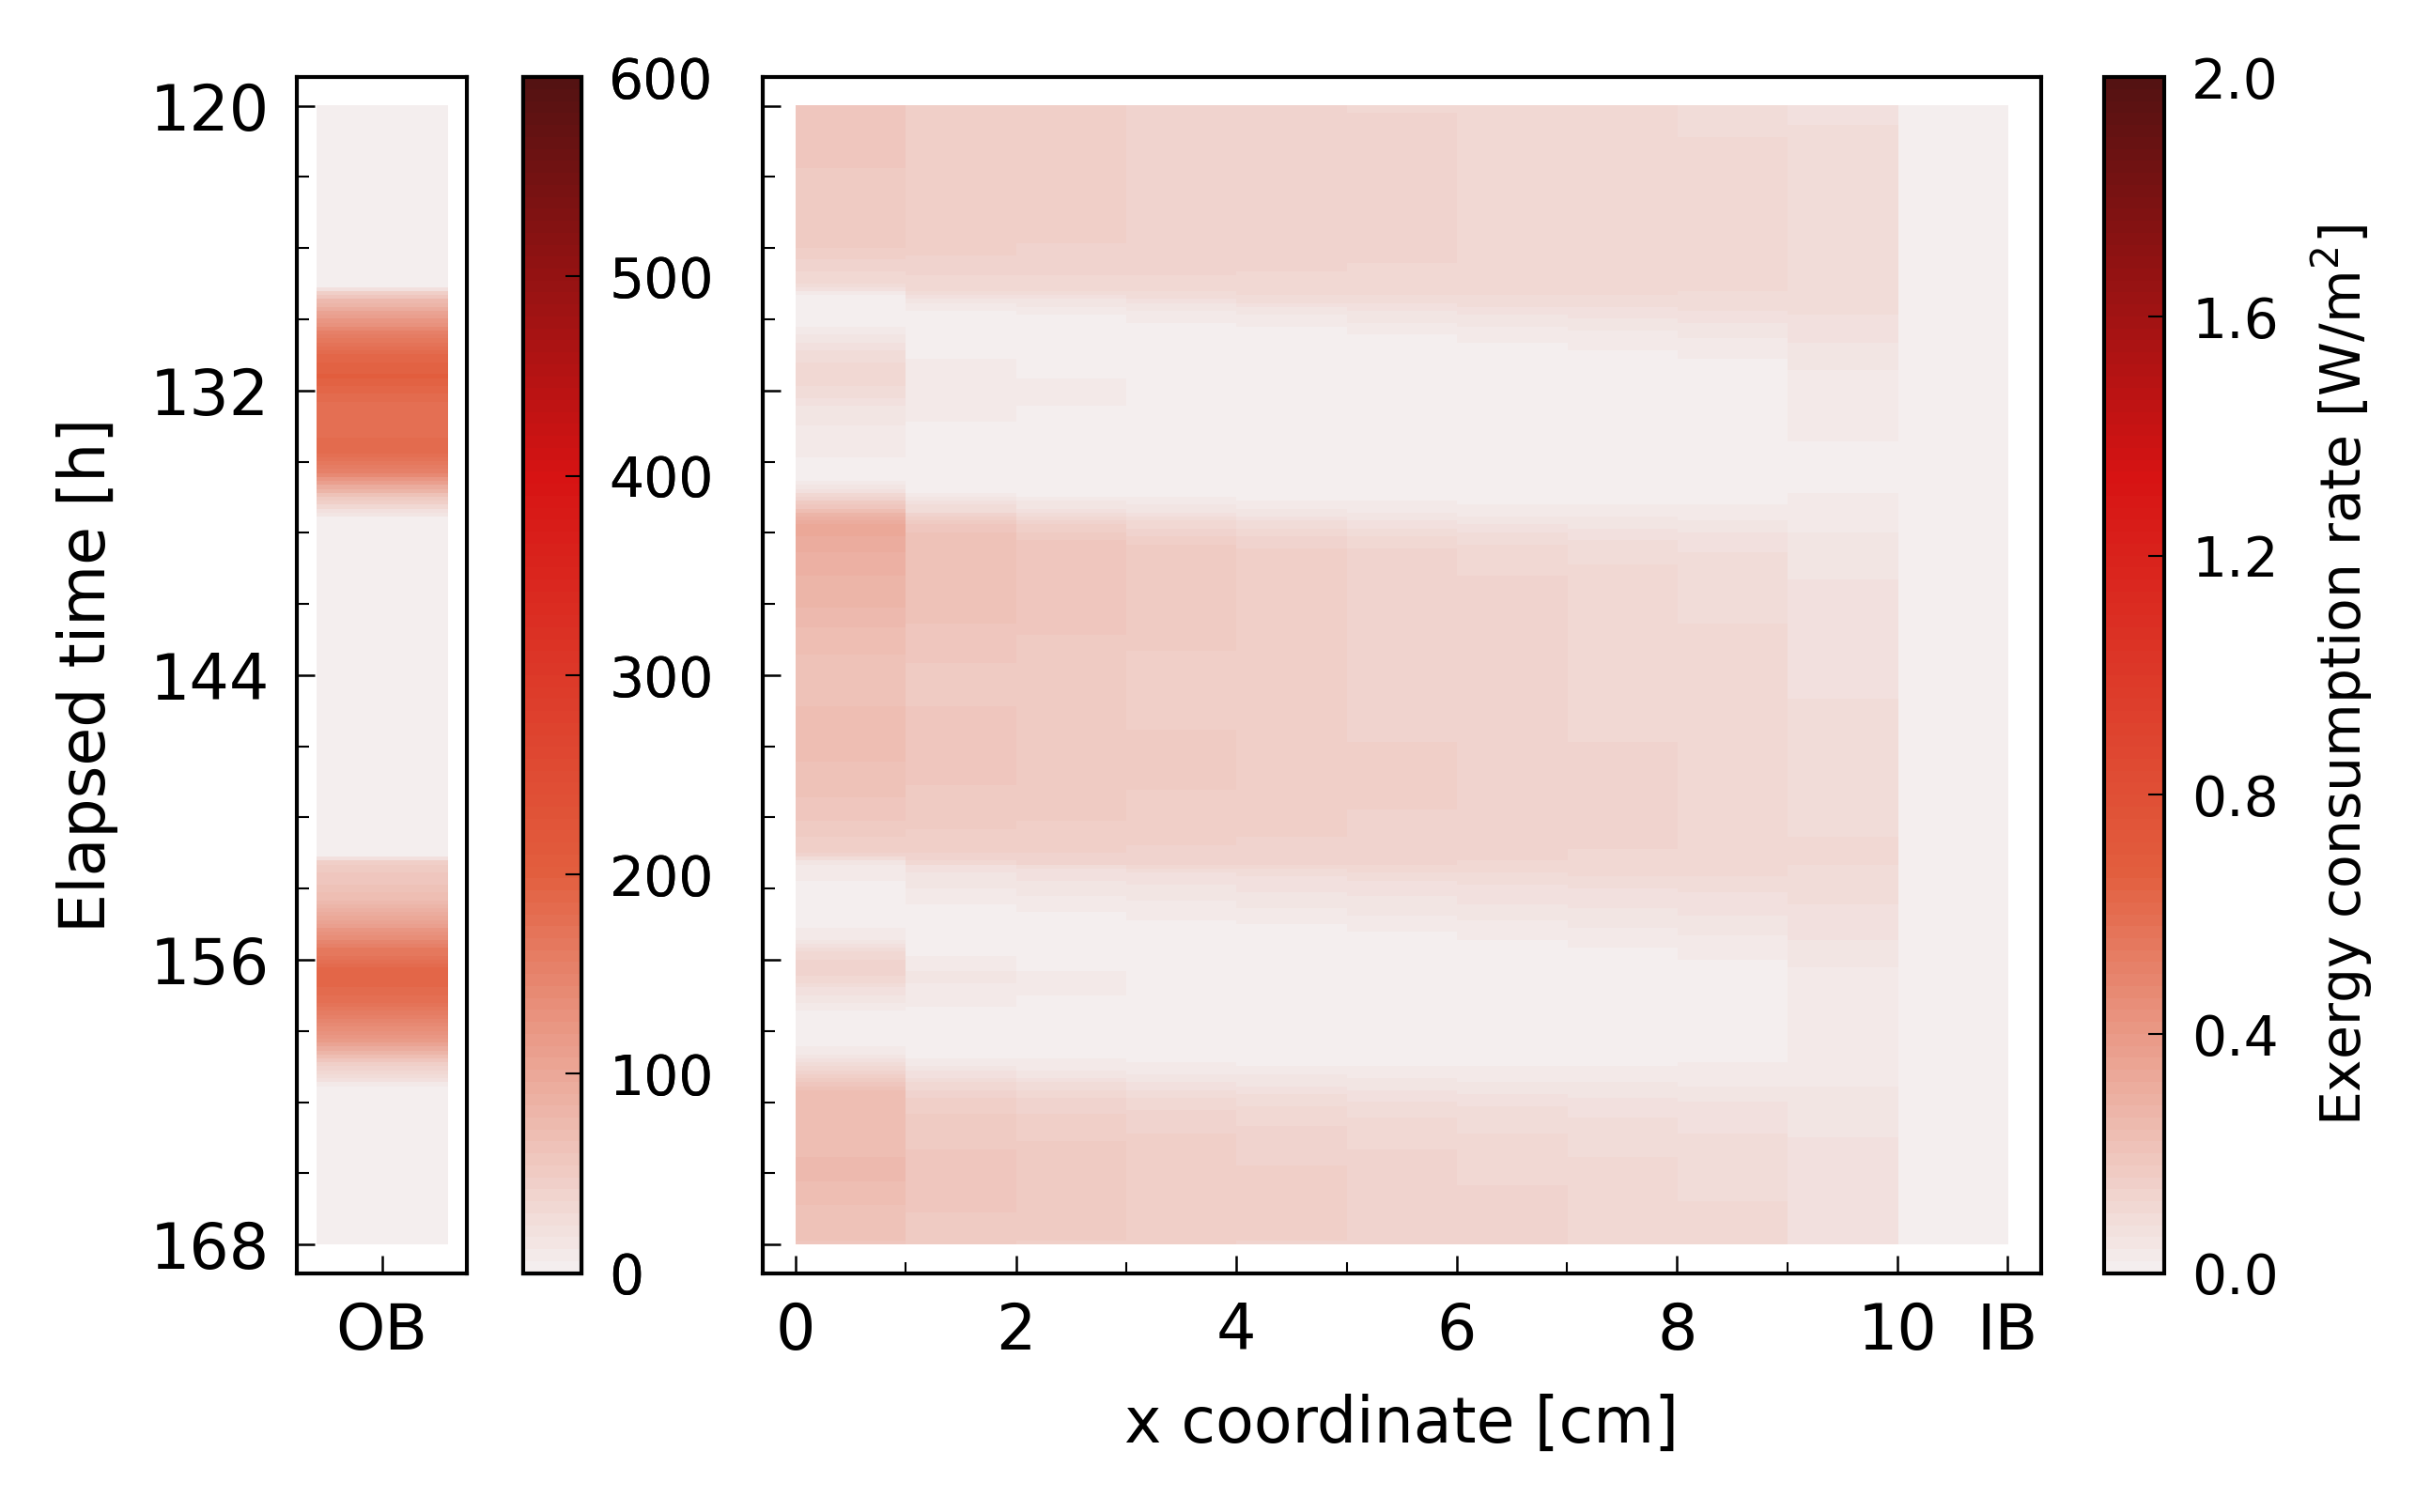

In [51]:
N = 1
nrows = 1
ncols = 2
nfigs = nrows*ncols

subset_data = df_exergy_c_data.iloc[int((winter_start_day+5*24)*hour_to_sec/t):int(winter_end_day*hour_to_sec/t),:]
IB_data = df_exergy_IB.iloc[int((winter_start_day+5*24)*hour_to_sec/t):int(winter_end_day*hour_to_sec/t),2]
concat_data = pd.concat([subset_data, IB_data], axis=1)
BL_data = df_exergy_OB.iloc[int((winter_start_day+5*24)*hour_to_sec/t):int(winter_end_day*hour_to_sec/t),1]
df_BL_data = pd.DataFrame(BL_data)
data =  [df_BL_data, concat_data]

# Create a figure and axes for the heatmap
fig, ax = plt.subplots(
    nrows, ncols, 
    sharex=False, sharey=True, 
    figsize=(cm2in(12),cm2in(7)), 
    facecolor='w', edgecolor='k',
    squeeze=False,
    dpi = 600,
    gridspec_kw={'width_ratios': [1, 10]}
    )

# tick settings 
xmin = [0]*nfigs #tick minimum value, nfig 갯수만큼 [ ] 생성 
xmax = [11]*nfigs #tick max value
xint = [2]*nfigs #tick Y_int
xmar = [0.3]*nfigs

ymin = [120]*nfigs
ymax = [168]*nfigs
yint = [12]*nfigs
ymar = [1.2]*nfigs

xlabel = ["x coordinate [cm]"]*nfigs
ylabel = ["Elapsed time [h]"]*nfigs

color1 = ['#F4EEEE', '#E25E3E', '#D71313', '#541212']
cmap1 = mcolors.LinearSegmentedColormap.from_list('my_colormap', color1, N=100)
norm2 = mcolors.Normalize(vmin=0, vmax=2)
norm1 = mcolors.Normalize(vmin=0, vmax=600)
norm_list = [norm1, norm2]

extent1 = [0, 1, 168, 120]
extent2 = [0, 11, 168, 120]
extent_list = [extent1, extent2]


# 플랏 그리기
for ridx in range(nrows):
    for cidx in range(ncols):
        idx = ncols*ridx + cidx
    
        im = ax[ridx, cidx].imshow(
        data[idx],
        cmap= cmap1,
        aspect='auto',
        extent=extent_list[idx],
        norm = norm_list[idx]
        )

        # 컬러바의 위치 설정
        cax = fig.add_axes([0.21, 0.10999999999999999, 0.022, 0.77001])

        # 첫 번째 그래프 컬러바 (커스텀)
        cb = plt.colorbar(cm.ScalarMappable(norm=norm1, cmap=cmap1), cax=cax)
        cb.set_ticks([0, 100, 200, 300, 400, 500, 600])   # 컬러바 눈금 설정
        cb.ax.tick_params(direction='in', labelsize=LEG_FS, width=0.25, length=2)
        cb.outline.set_linewidth(0.5)

        # 두 번째 그래프 컬러바 (종속형)
        if idx == 1:
            cbar2 = fig.colorbar(im,  ax=ax[ridx,cidx])
            cbar2.set_ticks([0, 0.4, 0.8, 1.2, 1.6, 2])
            cbar2.ax.tick_params(direction='in', labelsize=LEG_FS, width=0.25, length=2)
            cbar2.outline.set_linewidth(0.5)  
            cbar2.set_label(r"Exergy consumption rate $\mathrm{[W/m^2]}$", fontsize=LEG_FS)
        
        # # 라벨 설정
        if idx == 0:
            ax[ridx,cidx].set_ylabel(f'{ylabel[idx]}', fontsize=FS)
            ax[ridx,cidx].set_xlabel("")
        elif idx == 1:
            ax[ridx,cidx].set_xlabel("")
            ax[ridx,cidx].set_xlabel(f'{xlabel[idx]}', fontsize=FS)
        
        # 축 눈금 및 라벨 크기 설정
        ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='major', width=0.3, length=2.3)
        ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='minor', width=0.25, length=1.5)
        
        # 축 위치 설정
        if idx == 0:
            ax[ridx, cidx].set_xticks([0.5])
            ax[ridx, cidx].set_xticklabels(["OB"], fontsize=FS)
        elif idx == 1:
            ax[ridx, cidx].set_xticks([0, 2, 4, 6, 8, 10, 11])
            ax[ridx, cidx].set_xticklabels(["0", "2", "4", "6", "8", "10", "IB"], fontsize=FS)
        ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx]))
        
        
        # x,y 값 제한 
        if idx == 0:
            ax[ridx,cidx].set_xlim(0-0.15, 1+0.15)
        elif idx == 1:
            ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
        ax[ridx,cidx].set_ylim(ymax[idx]+ymar[idx], ymin[idx]-ymar[idx])
        ax[ridx,cidx].margins(x=0, y=0)


        # 보조 눈금의 수
        ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
        ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(4))
        
        # 두 번째 그래프 위치 조정
        if idx == 1:
            ax[ridx,cidx].set_position([0.3, 0.10999999999999999, 0.48, 0.77001])  

        # 그래프 외곽 라인 설정     
        for k in ['top','bottom','left','right']:
                ax[ridx,cidx].spines[k].set_visible(True)
                ax[ridx,cidx].spines[k].set_linewidth(0.5)
                ax[ridx,cidx].spines[k].set_color('k') 

    # 네 꼭짓점 좌표 얻기
x0 = fig.bbox.x0
y0 = fig.bbox.y0
x1 = fig.bbox.x1
y1 = fig.bbox.y1

print("왼쪽 하단 꼭짓점:", x0, y0)
print("오른쪽 상단 꼭짓점:", x1, y1)

plt.show()

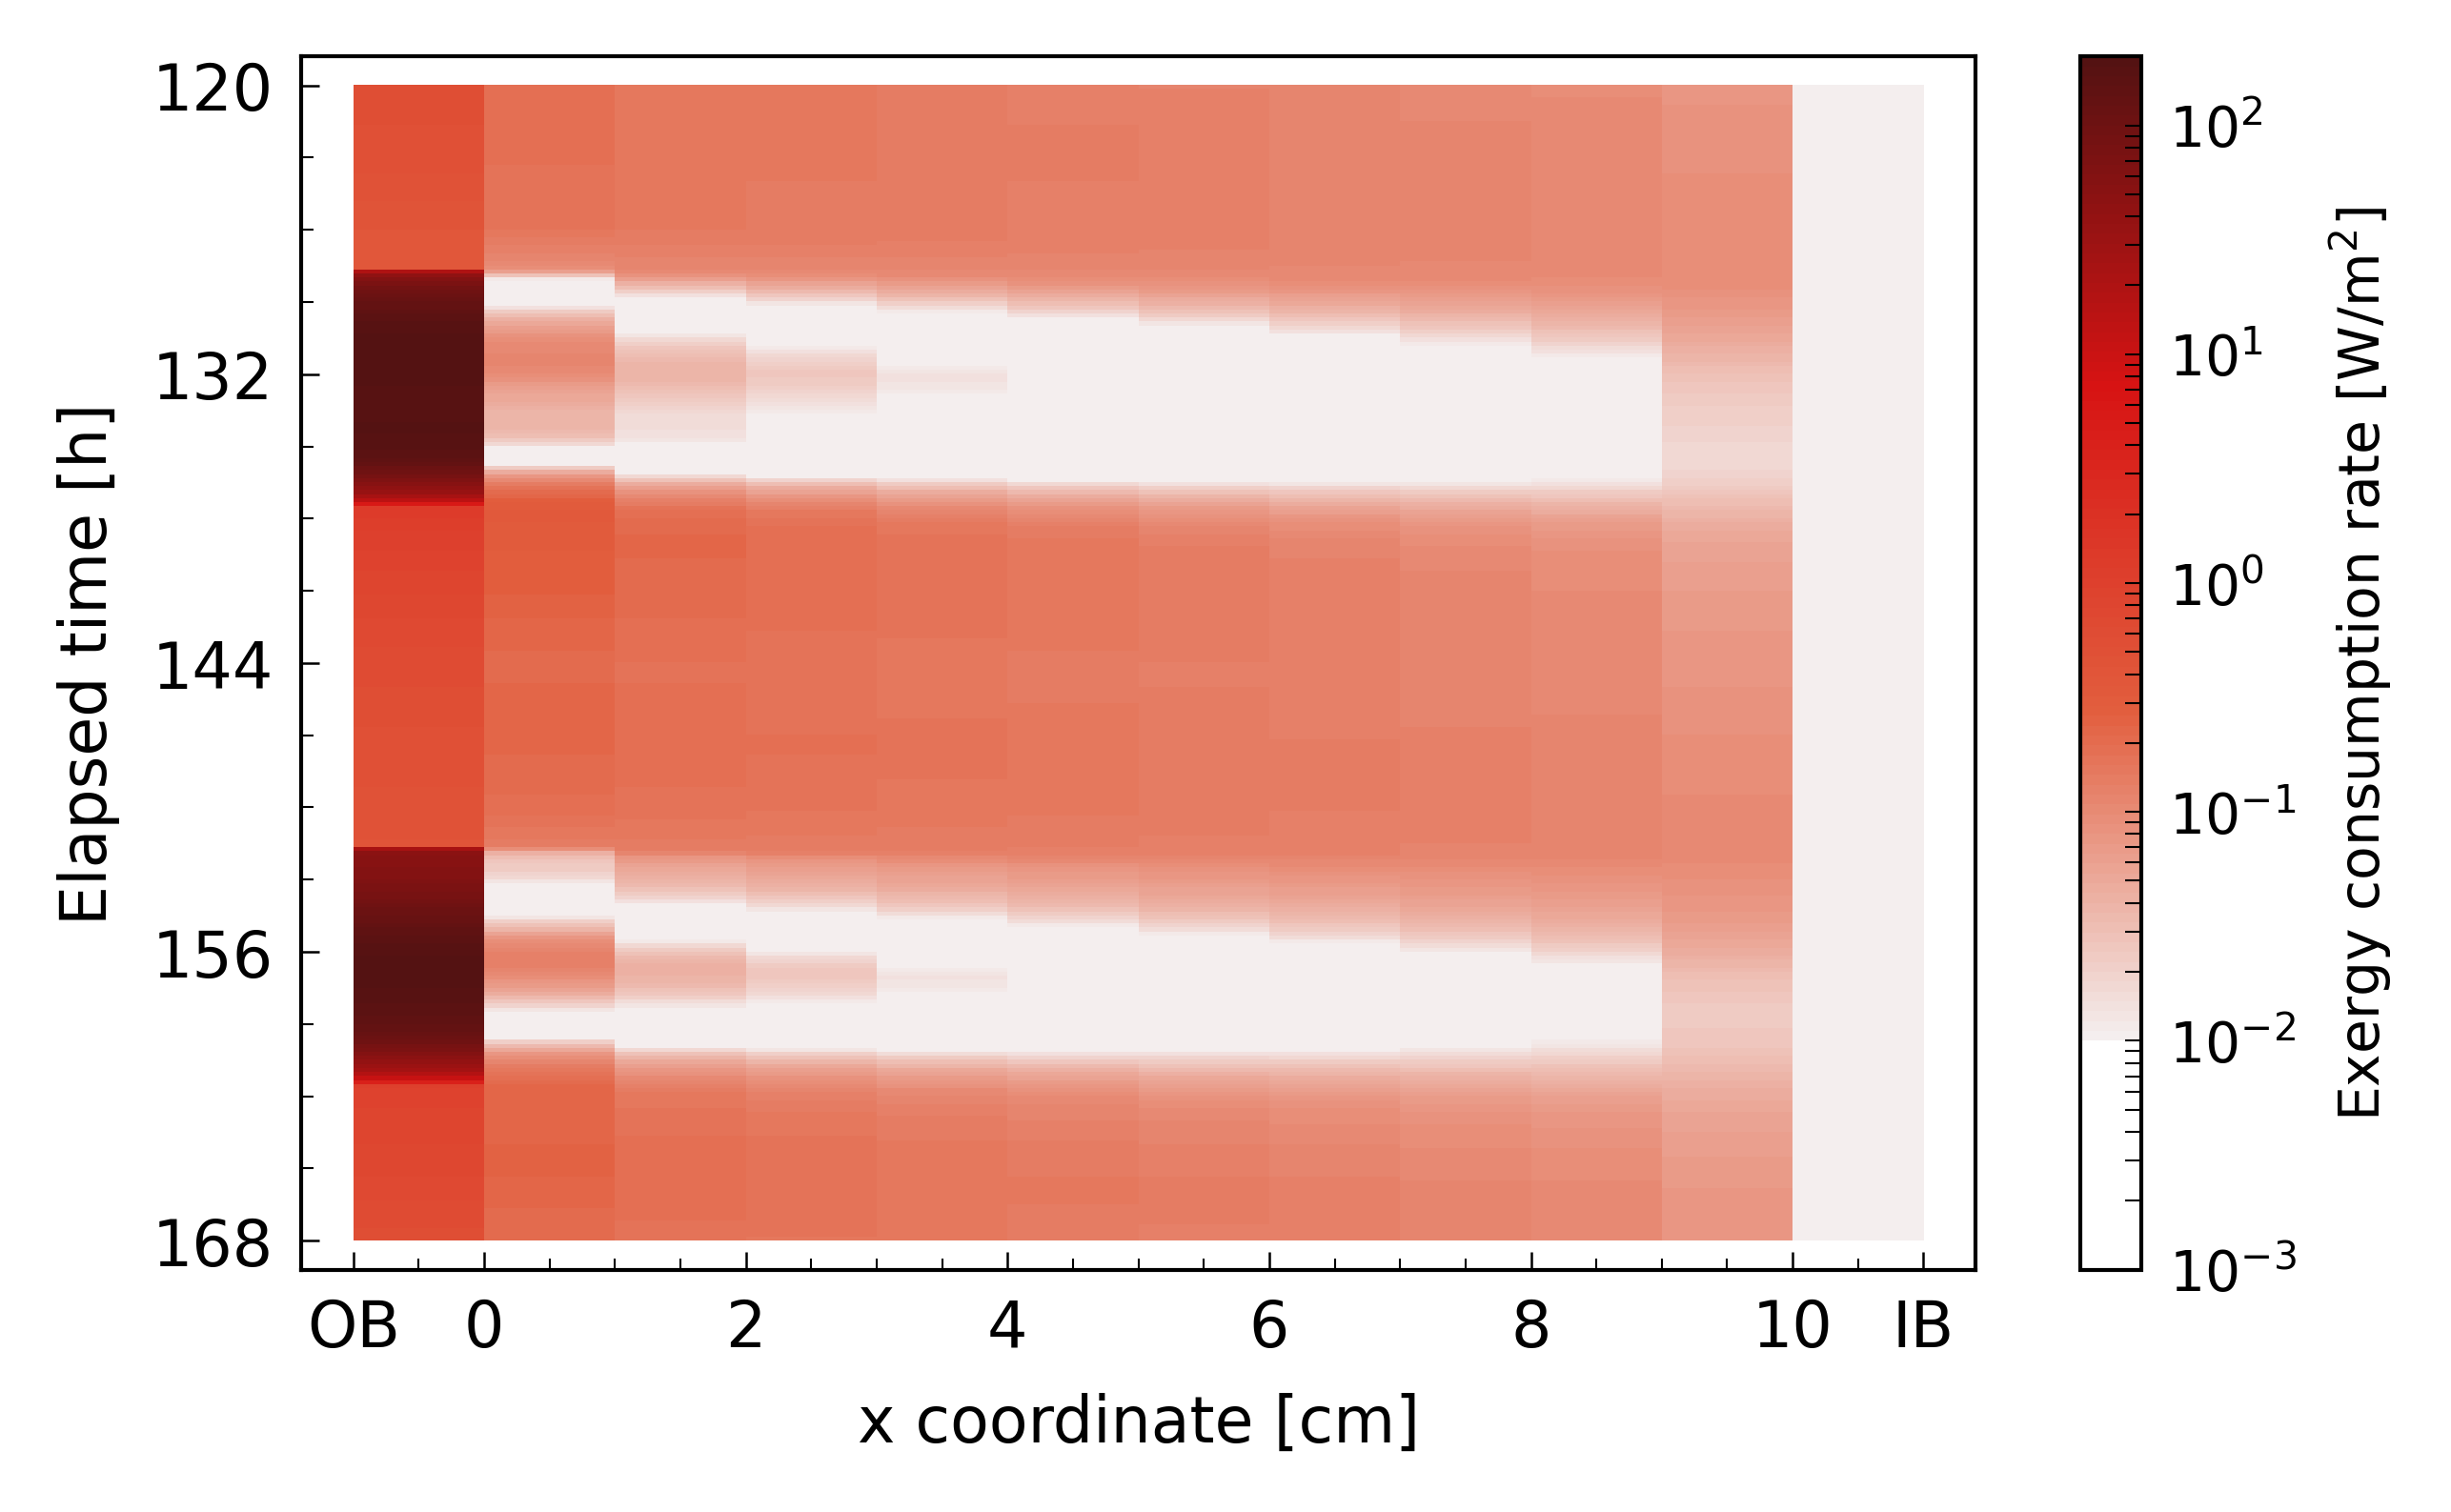

In [87]:
N = 1
nrows = 1
ncols = 1
nfigs = nrows*ncols

subset_data = df_exergy_c_data.iloc[int((winter_start_day+5*24)*hour_to_sec/t):int(winter_end_day*hour_to_sec/t),:]
IB_data = df_exergy_IB.iloc[int((winter_start_day+5*24)*hour_to_sec/t):int(winter_end_day*hour_to_sec/t),2]
BL_data = df_exergy_OB.iloc[int((winter_start_day+5*24)*hour_to_sec/t):int(winter_end_day*hour_to_sec/t),1]
df_BL_data = pd.DataFrame(BL_data)
concat_data = pd.concat([BL_data, subset_data, IB_data], axis=1)

# Create a figure and axes for the heatmap
fig, ax = plt.subplots(
    nrows, ncols, 
    sharex=False, sharey=True, 
    figsize=(cm2in(12),cm2in(7)), 
    facecolor='w', edgecolor='k',
    squeeze=False,
    dpi = 600
    )

# tick settings 
xmin = [0]*nfigs #tick minimum value, nfig 갯수만큼 [ ] 생성 
xmax = [12]*nfigs #tick max value
xint = [2]*nfigs #tick Y_int
xmar = [0.4]*nfigs

ymin = [120]*nfigs
ymax = [168]*nfigs
yint = [12]*nfigs
ymar = [1.2]*nfigs

xlabel = ["x coordinate [cm]"]*nfigs
ylabel = ["Elapsed time [h]"]*nfigs

color1 = ['#F4EEEE', '#E25E3E', '#D71313', '#541212']
cmap1 = mcolors.LinearSegmentedColormap.from_list('my_colormap', color1, N=100)


vmin = 200  # 데이터프레임 내 모든 값 중 최솟값
vmax = 0  # 데이터프레임 내 모든 값 중 최댓값



# norm1 = LogNorm(vmin=concat_data.min().min(), vmax=concat_data.max().max())
norm1 = LogNorm(vmin=0.01, vmax=200)
extent1 = [0, 12, 168, 120]

# 플랏 그리기
for ridx in range(nrows):
    for cidx in range(ncols):
        idx = ncols*ridx + cidx
    
        im = ax[ridx, cidx].imshow(
        concat_data,
        cmap= cmap1,
        aspect='auto',
        extent=extent1,
        norm = norm1
        )

        # 컬러바 설정 (로그 스케일)
        cbar = fig.colorbar(im, ax=ax[ridx, cidx])
        cbar.set_ticks([0.001 , 0.01, 0.1, 1, 10, 100])
        cbar.ax.tick_params(which='both', direction='in', labelsize=LEG_FS, width=0.25, length=2)
        cbar.outline.set_linewidth(0.5)  
        cbar.set_label(r"Exergy consumption rate $\mathrm{[W/m^2]}$", fontsize=LEG_FS)
        
        # # 라벨 설정
        ax[ridx,cidx].set_ylabel(f'{ylabel[idx]}', fontsize=FS)
        ax[ridx,cidx].set_xlabel(f'{xlabel[idx]}', fontsize=FS)
        
        # 축 눈금 및 라벨 크기 설정
        ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='major', width=0.3, length=2.3)
        ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='minor', width=0.25, length=1.5)
        
        # 축 위치 설정
        ax[ridx, cidx].set_xticks([0, 1, 3, 5, 7, 9, 11, 12])
        ax[ridx, cidx].set_xticklabels(["OB", "0", "2", "4", "6", "8", "10", "IB"], fontsize=FS)
        ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx]))
        
        
        # x,y 값 제한 
        ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
        ax[ridx,cidx].set_ylim(ymax[idx]+ymar[idx], ymin[idx]-ymar[idx])
        ax[ridx,cidx].margins(x=0, y=0)


        # 보조 눈금의 수
        ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
        ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(4))
        
        # # 그리드 설정 
        # ax[ridx,cidx].grid(True, axis='both', linestyle='--', linewidth=LW[1], color='0.25', alpha = 0.5);    
        

        # 그래프 외곽 라인 설정     
        for k in ['top','bottom','left','right']:
                ax[ridx,cidx].spines[k].set_visible(True)
                ax[ridx,cidx].spines[k].set_linewidth(0.5)
                ax[ridx,cidx].spines[k].set_color('k')  

In [85]:
concat_data.max().max()

198.265516231343